<a href="https://colab.research.google.com/github/ethankyle360/ML_projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gold price dataset.csv')

In [3]:
# Print the first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# Print the number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# Get basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Check the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Get the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive correlation
2. Negative correlation

In [12]:
# Convert the Date column to a datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Run the corr() method again
correlation = gold_data.corr()

<Axes: >

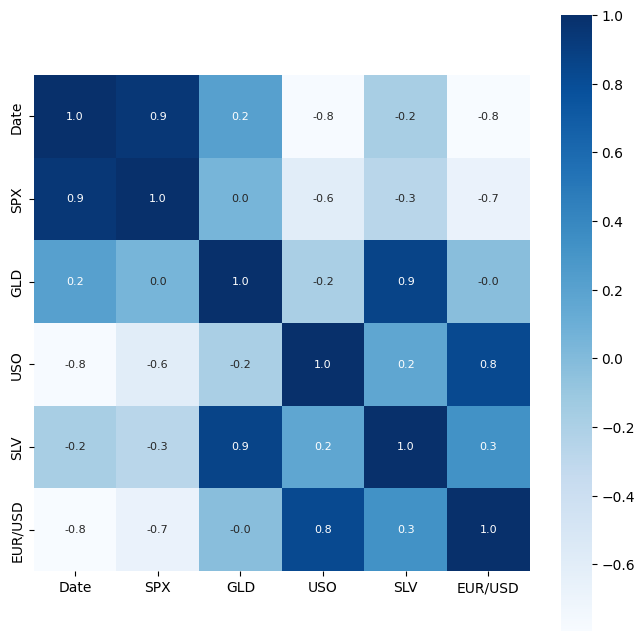

In [13]:
# Construct a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
# Correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


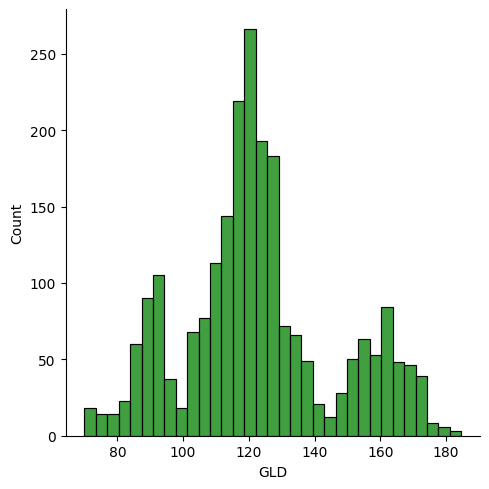

In [19]:
# Check the distribution of the GLD Price
sns.displot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [20]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [21]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training: Random Forest Regressor

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [25]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.53529928  81.77009964 116.3344995  127.51190081 120.67300151
 154.87339811 150.2854986  126.0991004  117.45799873 126.0383007
 116.70760082 171.99390028 141.3141982  168.10199916 115.18540006
 117.43450077 140.1358023  170.3018012  159.89850244 157.44280001
 155.13340048 125.12450008 175.40870023 157.60500293 125.16440068
  93.82149992  77.44190022 120.76930001 119.07549954 167.41520005
  88.25410088 125.34239989  91.07300063 117.78549987 120.99499937
 136.08000144 115.34150089 114.7711009  147.81500038 107.10480111
 104.13090244  87.25599768 126.56930067 117.8530002  153.88749857
 119.5662003  108.42119964 107.92929784  93.15680089 127.17609744
  74.46210028 113.66149876 121.32010016 111.41439907 118.90329889
 120.52399967 159.9363     166.67450088 146.88559661  85.97329875
  94.1157003   86.88239891  90.58050024 118.95200059 126.51260033
 127.52529991 169.67700023 122.23209954 117.4847986   98.6286
 166.95140143 143.50239811 132.29950234 121.1795022  121.20749948
 119.66950077 1

In [27]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.9893715893477268


Compare the actual values and predicted values in a plot

In [28]:
Y_test = list(Y_test)

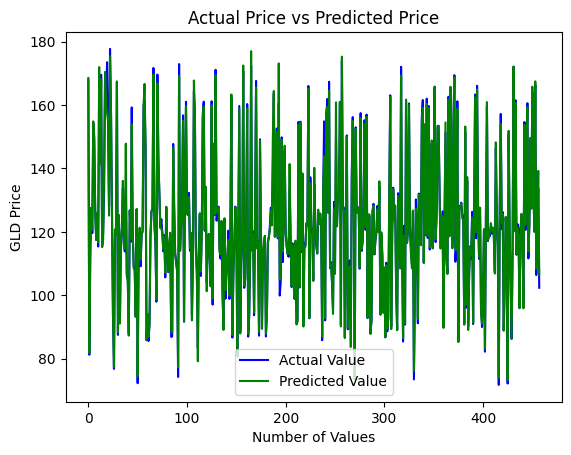

In [29]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()